In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
# create a random date generator given a year and month
def random_date(year, month):
    import random
    import time
    import datetime
    start = datetime.datetime(year, month, 1, 18, 0, 0)
    end = datetime.datetime(year, month, 31, 18, 0, 0)
    start_epoch = start.timestamp()
    end_epoch = end.timestamp()
    random_second = random.randrange(int(start_epoch), int(end_epoch))
    random_second = datetime.datetime.fromtimestamp(random_second)
    return random_second.strftime('%Y-%m-%d' + ' 18:00:00')

random_date(2017, 10)




'2017-10-28 18:00:00'

In [75]:
from datetime import datetime
from datetime import datetime
# Load the data
data = pd.read_csv('INBRE_App_Output/output_data_in_9_2017.csv')
date=(pd.to_datetime(data['system:time_start'],unit='ms')) 
pm25 = data['pm25']
pm_predicted = data['pm_predicted']
station = data['station']
df = pd.DataFrame({'pm25': pm25, 'pm_predicted': pm_predicted, 'station': station, 'date': date})

# Print the final DataFrame
print(df)


        pm25  pm_predicted           station                date
0    29.6405           NaN           Bozeman 2017-09-01 18:00:00
1    83.1330     65.918499           Broadus 2017-09-01 18:00:00
2    37.1280           NaN             Butte 2017-09-01 18:00:00
3    31.1240           NaN   Flathead Valley 2017-09-01 18:00:00
4    37.6155           NaN        Frenchtown 2017-09-01 18:00:00
..       ...           ...               ...                 ...
979   2.0500           NaN             NCore 2017-09-30 18:00:00
980  20.4910           NaN       Seeley Lake 2017-09-30 18:00:00
981   1.8645      2.714066            Sidney 2017-09-30 18:00:00
982   7.3785           NaN    Thompson Falls 2017-09-30 18:00:00
983   9.5530           NaN  West Yellowstone 2017-09-30 18:00:00

[984 rows x 4 columns]


In [18]:
model = LinearRegression()

X, y = df['pm25'], df['pm_predicted']

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = np.nan_to_num(y, nan=0)

model.fit(X, y)

r_squared = model.score(X, y)

rmse = sqrt(mean_squared_error(X, y))
print(rmse)
print(r_squared)


49.04909243479851
0.3592126100006712


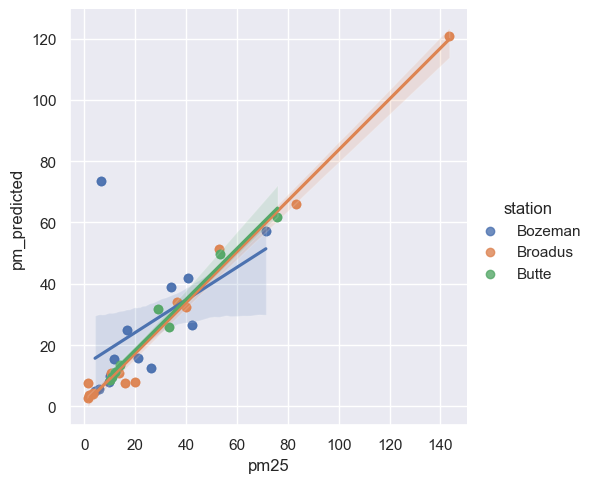

In [21]:
sns.set_theme()
filtered_df = df[df['station'].isin(['Bozeman', 'Broadus', 'Butte'])]

g = sns.lmplot(
    data=filtered_df,
    x="pm25", y="pm_predicted", hue="station",
    height=5
)

g.set_axis_labels("pm25", "pm_predicted")

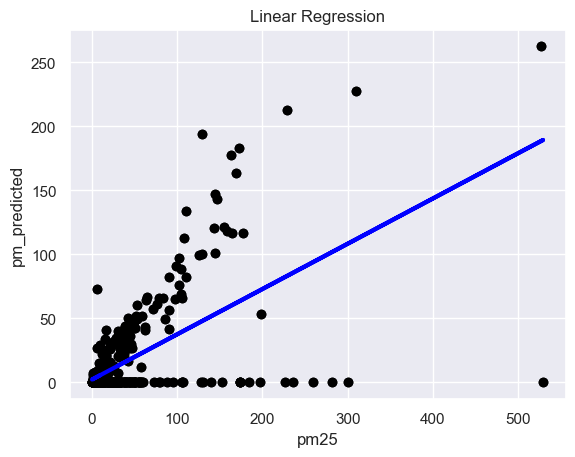

In [19]:
# plotting data
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.title('Linear Regression')
plt.xlabel('pm25')
plt.ylabel('pm_predicted')
plt.show()
